# Two - Armed Bandit Strategy
The following is the code for Q1 for endsem. The results and analysis can be found in the accompanying document in the same folder

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
alpha = 0.25
beta = 0.95
def StrategyGenerator(alpha,beta):
    Iterations = 100
    states = 4

    #print("Alpha = :",alpha)
    #print("Beta = :",beta)
    State_status = np.zeros((states,Iterations))

    transition_matrix = np.array([[alpha, 1-alpha, 0, 0],
                              [0, 0, beta, 1-beta],
                              [0, 0, beta, 1-beta],
                              [alpha, 1-alpha, 0, 0]])

    #print("Transition Matrix: \n",transition_matrix)
    X = np.array([[0.25,0.25,0.25,0.25]])

    for i in range(states):
        State_status[i][0] = X[0][i]
    #print(State_status)

    Prev = np.copy(X)
    #print(X.shape)
    Last_Iter = 0

    for i in range(Iterations-1):
        #print("Iteration :",i)
        X = np.dot(Prev,transition_matrix)
        #for j in range(states):
        #print(Prev)
        #print(X)
        for m in range(states):
            State_status[m][i+1] = X[0][m]
    
        if np.array_equal(X,Prev):
            Last_Iter=i 
            flag = 1
            break
        Prev = np.copy(X)
        #print(X)

    #print(X)
    
    for i in range(Iterations):
        for j in range(states):
            if State_status[j][i]==0:
                State_status[j][i]=State_status[j][i-1]
            
    if Last_Iter!=0:
        Final_State = np.zeros((states,Last_Iter))
        for i in range(Last_Iter):
            for j in range(states):
                Final_State[j][i] = State_status[j][i]
    else:
        Final_State = np.zeros((states,Iterations))
        for i in range(Iterations):
            for j in range(states):
                Final_State[j][i] = State_status[j][i]
    #print(Final_State)
    #print(X)  
    return X[0][0]+X[0][2],(0.5*alpha)+(0.5*beta)
  
#print(State_status)
#print(Final_State)


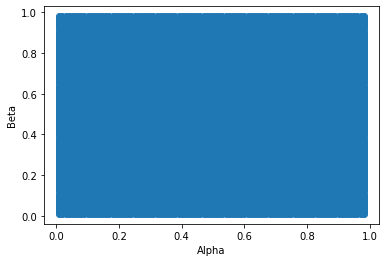

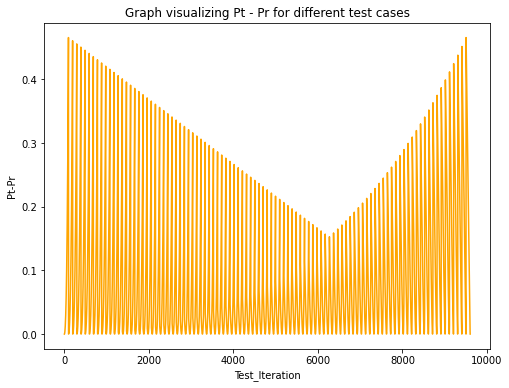

In [7]:
data = [] 
for i in range(1,99):
    for j in range(1,99):
        data.append([i,j])

SampleArray = np.asarray(data).astype('float32')
SampleArray/=100
plt.scatter(SampleArray[:,0], SampleArray[:,1])
plt.xlabel('Alpha')
plt.ylabel('Beta')
plt.show()

Pt = np.zeros(9604)
Pr = np.zeros(9604)
for i in range(len(data)):
    Pt[i],Pr[i] = StrategyGenerator(SampleArray[i][0],SampleArray[i][1])

plt.figure(figsize=(8,6))
plt.plot(Pt-Pr,color = "Orange")
plt.xlabel("Test_Iteration")
plt.ylabel("Pt-Pr")
plt.title("Graph visualizing Pt - Pr for different test cases")
#plt.plot(min(Pt-Pr))
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
for i in range(states):
    plt.plot(Final_State[i],label = "State "+(str)(i+1))
    #plt.plot(Final_State[1],label = "State B")
    plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Probabilities")
plt.title("Achieving steady state: Equilibrium Distribution")